In [1]:
# Importing the librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<h1> Importing the  Medical Cost Personal Datasets

In [2]:
# loading the data from csv file to a Pandas dataframe

insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [7]:
# Informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<h1> Data Analysis

In [8]:
# stactical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<h1> Visualize the distribution on each column

<Figure size 600x600 with 0 Axes>

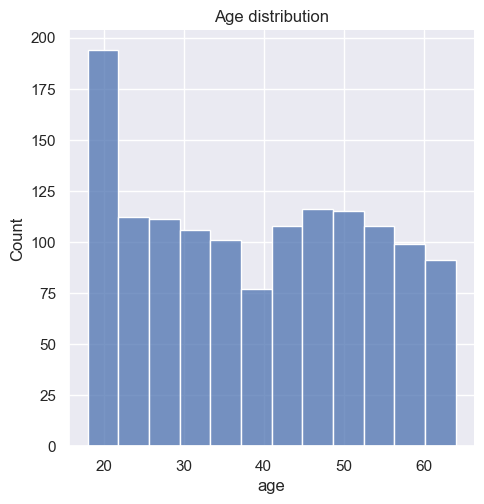

In [13]:
# find the distribution of the age value
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

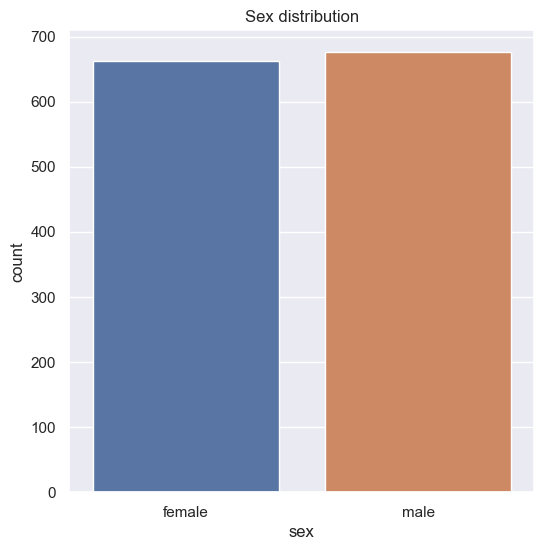

In [16]:
# find the distribution of the gender columns
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex distribution')
plt.show()

In [18]:
insurance_dataset['sex'].value_counts() #the number of males and females

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

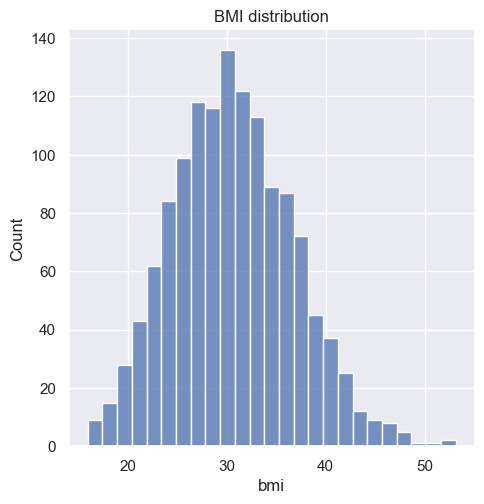

In [19]:
# find the distribution of the BMI value
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI distribution')
plt.show() # ===> IT'S A NORMAL DISTRIBUTION

<Figure size 600x600 with 0 Axes>

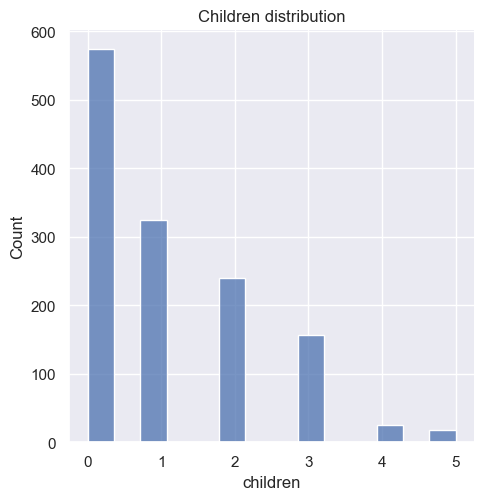

In [20]:
# find the distribution of the Children value
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['children'])
plt.title('Children distribution')
plt.show()

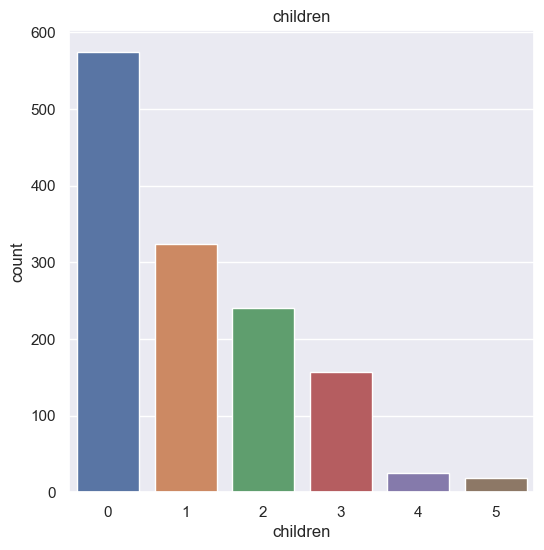

In [23]:
# we can also use 
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children')
plt.show()

In [24]:
# let's count the number of childrens
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

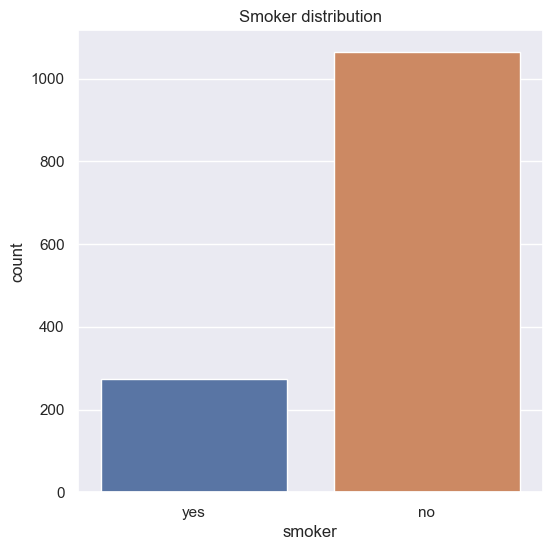

In [21]:
# find the distribution of the Smoker columns
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker distribution')
plt.show()

In [25]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

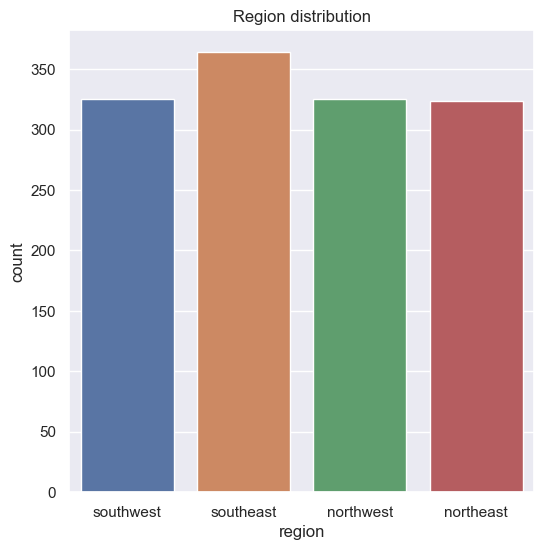

In [22]:
# find the distribution of the region columns
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region distribution')
plt.show()

In [26]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 600x600 with 0 Axes>

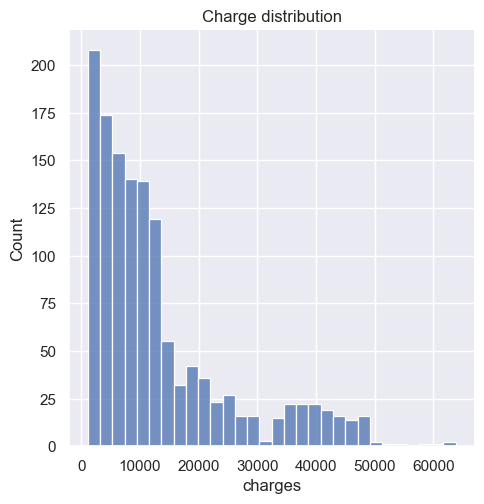

In [27]:
# find the distribution of the target value Charges
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charge distribution')
plt.show()

<h1> Data preprocessing

<h4> We need to transform the categorical data into numerical values in order to be used and implemented in our model

Incoding the categorical features

In [29]:
# encoding the 'sex' column
# Female ==> 1  &&    Male ==> 0
insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)


# encoding 'smoker' column
# smoker yes ==> 0  &&    smoker no ==> 0
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southwest':1, 'southeast':0, 'northeast': 2, 'northwest':3}},inplace=True)

# For the 'region' column we can use hot encoding method !!!

In [31]:
insurance_dataset.head() # Encoding is done successfully!!

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


<h1>Splitting the features and target

In [32]:
X = insurance_dataset.drop(columns='charges',axis=1)
Y =  insurance_dataset['charges']

<h1> Splitting the data into training and testing and data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
X_train.shape # 80% of the data

(1070, 6)

In [37]:
X_test.shape # 20% of the data

(268, 6)

<h1> Model training 
<h2> Linear regression model

In [38]:
# loading the linear regression model
regressor = LinearRegression()

In [39]:
regressor.fit(X_train,Y_train)

LinearRegression()

<h1>Model Evaluation

In [40]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [43]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
# here we compare the true values 'Y_train' to the predicted value 'training_data_prediction'
print("R squared values : ",r2_train)

R squared values :  0.751505643411174


In [44]:
# prediction on test data
testing_data_prediction = regressor.predict(X_test)

In [45]:
# R squared value
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
# here we compare the true values 'Y_test' to the predicted value 'testing_data_prediction'
print("R squared values : ",r2_test)

R squared values :  0.7447273869684077


<h1> Building a Predictive System

In [47]:
input_data = (31,1,25.74,0,1,0) # => tuple data

#  changing input data (tuple) into a numpy array
input_data_as_numpy_array = np.asanyarray(input_data)


# reshape the array
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshape)
print("the predition is : ",prediction[0])  # very very close value ==> the model is performing well
# [0] To remove the brackets  instead of printing [ 3760.0805764960496] we print [ 3760.0805764960496]

the predition is :  3760.0805764960496


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
